# Assignment 3:  ridge regression

Due date:  Friday 10/5 at 11:59pm


**Namita Kharat**

## Preliminaries 

In this assignment you will explore ridge regression applied to the task of predicting wine quality.
You will use the [wine quality](http://archive.ics.uci.edu/ml/datasets/Wine+Quality)
dataset from the UCI machine learning repository, and compare accuracy obtained using ridge regression to the results from a [recent publication](http://www.sciencedirect.com/science/article/pii/S0167923609001377#).
If you have trouble accessing that version of the paper, here's a link to a [preprint](http://www3.dsi.uminho.pt/pcortez/wine5.pdf).
The wine data is composed of two datasets - one for white wines, and one for red wines.  In this assignment perform all your analyses on just the red wine data.

The features for the wine dataset are not standardized, so make sure you do this, especially since we are going to consider the magnitude of the weight vector (recall that standardization entails subtracting the mean and then dividing by the standard deviation for each feature; you can use  Numpy/scikit-learn to perform this computation.


## Part 1

Implement ridge regression in a class called RidgeRegression that implements the classifier API, i.e. ``fit`` and ``predict`` methods with the same signature as the classifiers you implemented in the previous assignment.  Also implement functions for computing the following measures of error:

  * The Root Mean Square Error (RMSE).
  * The Maximum Absolute Deviation (MAD).

For a hypothesis $h$, they are defined as follows:

$$RMSE(h) = \sqrt{\frac{1}{N}\sum_{i=1}^N (y_i - h(\mathbf{x}_i))^2}$$

and

$$MAD(h) = \frac{1}{N}\sum_{i=1}^N |y_i - h(\mathbf{x}_i)|.$$

With the code you just implemented, your next task is to explore the dependence of validation-set error on the value of the regularization parameter, $\lambda$.
In what follows set aside 30% of the data for validation, and compute the in-sample error, and the validation-set error as a function of the parameter $\lambda$ on the red wine data.  Choose the values of $\lambda$ on a logarithmic scale with values 0.01, 0.1, 1, 10, 100, 1000 and plot the RMSE.
Repeat the same experiment where instead of using all the training data, choose 20 random examples out of the training set, and train your model using those 20 examples, while evaluating on the same validation set.

Now answer the following:

  * What is the optimal value of $\lambda$?
  * What observations can you make on the basis of these plots?  (The concepts of overfitting/underfitting should be addressed in your answer).
  * Finally, compare the results that you are getting with the published results in the paper linked above.  In particular, is the performance you have obtained comparable to that observed in the paper?  Please note that for a completely fair comparison, the comparison needs to be made on a separate test set, in the same way the experiment was performed in the paper.


## Answers

* The optimal value of $\lambda$ on the validation set is 10. 

* The plot of regularization parameter ($\lambda$) versus error shows that as the $\lambda$ increases, RMSE and MAD value increases. This is because the regularization parameter controls the penalization of features and as $\lambda$ increases, penalization for the features increases which leads to simpler model resulting in underfitting. Thus, for training set error, overfitting begins to subside and underfitting occurs with increase in $\lambda$. For validation set, RMSE first decreases (they have very minute variations in the values) till the optimal value of $\lambda$ (which is 10 in my case) and then increases. 
  
* The calculated MAD for optimal value of lambda is 0.51 and in the paper, MAD value is 0.50. After multiple runs, my MAD value varies from 0.49 to 0.51 which is similar to the one mentioned in the paper.
  
  

## Import Libraries

In [74]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statistics as stat
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

## Ridge Regression Algorithm

In [75]:
class RidgeRegression :
 
    """An implementation of the Ridge Regression algorithm."""
 
    def __init__(self, lamda) : 
        self.lamda = lamda                                 # Regularisation parameter
 
    def fit(self, X, y) :
        """
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
        ones = np.ones((np.size(X, 0), 1))                  # Vector of all 1's
        X = np.append(ones, X, 1)                           # Adding the Bias term
        self.w = np.dot(np.linalg.inv(np.dot(X.T,X)+self.lamda*np.eye(X.shape[1])),np.dot(X.T,y))  #calculate w
    
    def predict(self, X) :                                  # returns score of X
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        """
        ones = np.ones((np.size(X, 0), 1))                  # Vector of all 1's
        X = np.append(ones, X, 1)                           # Adding the Bias term
        scores = np.inner(self.w, X)
        return scores

## RMSE and MAD Functions

In [76]:
def RMSE(Target,Predict):
    return np.sqrt(((Target - Predict) ** 2).mean())

def MAD(Target,Predict):
    return (np.abs(Target-Predict)).mean()

## Function to Read Data

In [77]:
def redwinedata_read():
    RedWine_Data=pd.read_csv("winequality-red.csv", delimiter=";", header=None)
    RedWine_DataFrame=pd.DataFrame(RedWine_Data)
    Redwine_data=RedWine_DataFrame.drop(index=0)                  # Drop 1st row i.e. Column Tags
    RedWineData=Redwine_data.reset_index(drop=True)               # Reset index to 0
    RedWine_xData = RedWineData.iloc[0:1600, 0:11]
    RedWine_xData=RedWine_xData.astype(np.float)
    RedWine_yData = RedWineData.iloc[0:1600, 11]
    # Standardization of Features
    Mean_xData=RedWine_xData.mean(axis=0)                         # Compute Mean
    Std_xData=RedWine_xData.std(axis=0)                           # Compute Standard Deviation 
    Standardized_xData=(RedWine_xData-Mean_xData)/Std_xData       # Formula: (x-Mean)/Standard Deviation
    x_features = Standardized_xData.astype(np.float)              # features
    y_labels = RedWine_yData.astype(np.float)                     # labels
    return x_features,y_labels,RedWine_DataFrame


## Plot

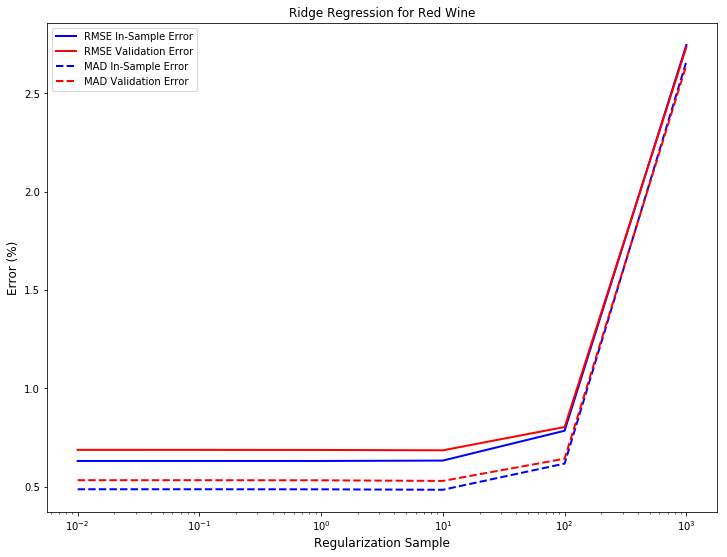

In [106]:
# Read Data
x_Data,y_Data,RedWine_DataFrame=redwinedata_read()                                
# Split Data into 70% Training and 30% Validation set
x_Train, x_Valid, y_Train, y_Valid = train_test_split(x_Data, y_Data, test_size=0.3,shuffle='True')  
xTrain=x_Train.values
xValid=x_Valid.values
yTrain=y_Train.values
yValid=y_Valid.values

lamda=[0.01,0.1,1,10,100,1000]                     # List of Regularization parameter

# In Sample Error
rmse_insample=[]
mad_insample=[]
for i in lamda:
    ridge_insample=RidgeRegression(i)
    ridge_insample.fit(xTrain,yTrain)    
    guesses_insample = ridge_insample.predict(xTrain)
    rmse_insample.append(RMSE(yTrain,guesses_insample))         # Compute RMSE for each lambda
    mad_insample.append(MAD(yTrain,guesses_insample))           # Compute MAD for each lambda
# Uncomment the following code to print the table
# print('Training Set')
# print('Lambda','\t','RMSE','\t\t\t','MAD')
# for x in range(6):
#     print(lamda[x],'\t',rmse_insample[x],mad_insample[x])   
#print('RMSE minimum',min(rmse_insample))
# Validation Set Error
rmse_validation=[]
mad_validation=[]
for i in lamda:
    ridge_validation=RidgeRegression(i)
    ridge_validation.fit(xTrain,yTrain)    
    guesses_validation = ridge_validation.predict(xValid)
    rmse_validation.append(RMSE(yValid,guesses_validation))     # Compute RMSE for each lambda
    mad_validation.append(MAD(yValid,guesses_validation))       # Compute MAD for each lambda
# Uncomment the following code to print the table
# print('Validation Set')
# print('Lambda','\t','RMSE','\t\t\t','MAD')
# for x in range(6):
#     print(lamda[x],'\t',rmse_validation[x],mad_validation[x])
#print('RMSE minimum',min(rmse_validation),'\nMAD',mad_validation)
# Plot
# Change size of the graph
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.semilogx(lamda, rmse_insample, color='blue', linewidth=2, label='RMSE In-Sample Error')
plt.semilogx(lamda, rmse_validation, color='red', linewidth=2, label='RMSE Validation Error')
plt.semilogx(lamda, mad_insample, color='blue', linestyle='dashed', linewidth=2, label='MAD In-Sample Error')
plt.semilogx(lamda, mad_validation, color='red', linestyle='dashed', linewidth=2, label='MAD Validation Error')
plt.ylabel('Error (%)', fontsize = '12')
plt.xlabel('Regularization Sample', fontsize = '12')
plt.title('Ridge Regression for Red Wine')
plt.legend(loc='best')
plt.show()

## 20 Random Examples out of Training Set

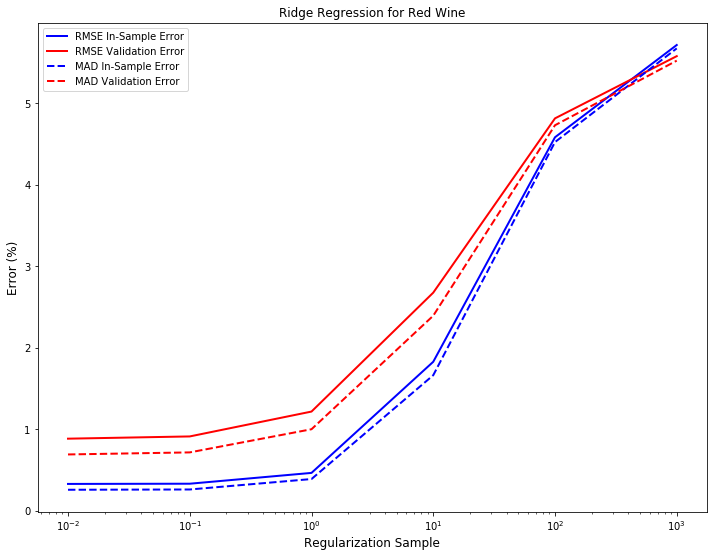

In [108]:
Train_Dataset=x_Train.join(y_Train)
# Generate 20 random samples out of Training set
TrainDataset_Random20=Train_Dataset.sample(n=20)
xTrain_20 = TrainDataset_Random20.iloc[:, 0:11].astype(np.float)                  #features
yTrain_20 = TrainDataset_Random20.iloc[:, 11].astype(np.float)                    #labels
xTrain_20=xTrain_20.values
yTrain_20=yTrain_20.values

# In Sample Error
rmse_insample_20=[]
mad_insample_20=[]
for i in lamda:
    ridge_insample_20=RidgeRegression(i)
    ridge_insample_20.fit(xTrain_20,yTrain_20)                                # Train on 20 random samples 
    guesses_insample_20 = ridge_insample_20.predict(xTrain_20)
    rmse_insample_20.append(RMSE(yTrain_20,guesses_insample_20))              # Compute RMSE for each lambda
    mad_insample_20.append(MAD(yTrain_20,guesses_insample_20))                # Compute MAD for each lambda
    
# Validation Set Error
rmse_validation_20=[]
mad_validation_20=[]
for i in lamda:
    ridge_validation_20=RidgeRegression(i)
    ridge_validation_20.fit(xTrain_20,yTrain_20)                              # Train on 20 random samples
    guesses_validation_20 = ridge_validation_20.predict(xValid)               # Validation on entire Validation set
    rmse_validation_20.append(RMSE(yValid,guesses_validation_20))             # Compute RMSE for each lambda
    mad_validation_20.append(MAD(yValid,guesses_validation_20))               # Compute MAD for each lambda

#Plot
plt.semilogx(lamda, rmse_insample_20, color='blue', linewidth=2, label='RMSE In-Sample Error')
plt.semilogx(lamda, rmse_validation_20, color='red', linewidth=2, label='RMSE Validation Error')
plt.semilogx(lamda, mad_insample_20, color='blue', linestyle='dashed', linewidth=2, label='MAD In-Sample Error')
plt.semilogx(lamda, mad_validation_20, color='red', linestyle='dashed', linewidth=2, label='MAD Validation Error')
plt.ylabel('Error (%)', fontsize = '12')
plt.xlabel('Regularization Sample', fontsize = '12')
plt.title('Ridge Regression for Red Wine')
plt.legend(loc='best')
plt.show()

## Observation

**RMSE for training set(random 20 samples from dataset) increases as the lambda increases because the increase value of lambda simplifies the model complexity which leads to underfitting. The RMSE for the validation set is greater than that for training set of 20 examples indicates that the model built is not good enough as it is not sufficiently trained with enough samples.**

## Part 2:  regression error characteristic curves

Regression Error Characteristic (REC) curves are an interesting way of visualizing regression error as described
in the following [paper](http://machinelearning.wustl.edu/mlpapers/paper_files/icml2003_BiB03.pdf).
Write a function that plots the REC curve of a regression method, and plot the REC curve of the best regressor you found in Part 1 of the assignment (i.e. the one that gave the lowest error on the validation set).  Plot the REC curve for both the validation set and the training set.
What can you learn from this curve that you cannot learn from an error measure such as RMSE or MAD?



## Answer

**RMSE or MAD error measure tells us that how close the observed data (Target) are to the model's predicted values whereas the REC curve characterizes the quality of the regression model for different levels of error tolerance. REC curve is a plot between error tolerance and percentage of points predicted within the tolerance. Therefore, the area-over-the-curve(AOC) should be minimum for a good regression model as AOC represents an overall error measure. Thus, one can predict which model is good out of several models based on their AOC of the  REC curve plot since the quicker the curve approches 100% or 1 accuracy, the better the model.**

## REC curve and Loss Function

In [90]:
def loss(Predict,Target):                           # Returns the square of the difference of target and predict
    return (Predict-Target)**2

def rec_curve(epsilon):
    eps=[]
    accuracy=[]
    epsilon_prev=0
    correct=0
    epsilon_sort=sorted(epsilon)                    # Sort the calculated loss in ascending order
    m=len(epsilon_sort)
    for i in range(m):
        if epsilon_sort[i] > epsilon_prev:          
            eps.append(epsilon_sort[i])
            accuracy.append(correct/m)          
            epsilon_prev=epsilon_sort[i]            # Update previous if it is less than the current loss value
        correct+=1
    eps.append(epsilon_sort[-1])                     # Append the last loss value
    accuracy.append(correct/m)
    return eps,accuracy


## Plot REC Curve

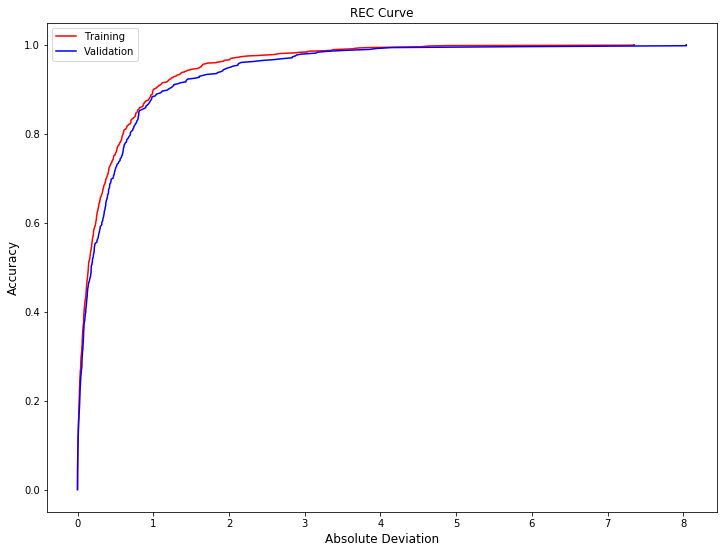

In [109]:
# Training Set
ridge_training=RidgeRegression(1)
ridge_training.fit(xTrain,yTrain)    
predict_train = ridge_training.predict(xTrain)
epsilon_train =loss(predict_train,yTrain)                            # Calculate Loss
epsilon_t,accuracy_t=rec_curve(epsilon_train)                        # Compute Accuracy

# Validation Set
ridge_valid=RidgeRegression(0.01)
ridge_valid.fit(xTrain,yTrain)    
predict_valid = ridge_valid.predict(xValid)
epsilon_valid =loss(predict_valid,yValid)                            # Calculate Loss
epsilon_v,accuracy_v=rec_curve(epsilon_valid)                        # Compute Accuracy

#Plot
plt.plot(epsilon_t,accuracy_t,color='red',label='Training')
plt.plot(epsilon_v,accuracy_v,color='blue',label='Validation')
plt.ylabel('Accuracy', fontsize = '12')
plt.xlabel('Absolute Deviation', fontsize = '12')
plt.title('REC Curve')
plt.legend(loc='best')
plt.show()

## Observation

**For last run, the area-over-the-curve for training dataset is less that for validation datatset and the REC curve for training dataset approches 100% accuracy at absolute deviation > 2.5.**

## Part 3:  weight vector analysis

As we discussed in class, the magnitude of the weight vector can be interpreted as a measure of feature importance.
Train a ridge regression classifier on a subset of the dataset that you reserved for training.
We will explore the relationship between the magnitude of weight vector components and their relevance to the classification task in several ways.
Each feature is associated with a component of the weight vector.  It can also be associated with the correlation of that feature with the vector of labels.
As we discussed in class, the magnitude of the weight vector can give an indication of feature relevance; another measure of relevance of a feature is its correlation with the labels.  To compare the two, 
create a scatter plot of weight vector components against the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) of the corresponding feature with the labels (again, you can use Numpy to compute it).
What can you conclude from this plot?
The paper ranks features according to their importance using a different approach.  Compare your results with what they obtain.

Next, perform the following experiment:
Incrementally remove the feature with the lowest absolute value of the weight vector and retrain the ridge regression classifier.
Plot RMSE as a function of the number of features that remain on the test set which you have set aside and comment on the results.


## Answer

**From the plot below, we can conclude that alcohol is the most important factor to determine the quality of wine (i.e an increase in the alcohol tends to result in higher quality of wine) as it has the largest value of Pearson Correlation Coefficient and weights followed by sulphates and volatile acidity being the least contributing feature in the determination of wine quality. According to the paper, sulphates is the most and citric acid is the least important feature in determining the quality of wine.**

**The plot for RMSE as a function of number of features shows that the RMSE decreases and then increases as the number of features increases. Thus, RMSE value is the least when 7 features are left according to the last run.  This is because we are removing the worst features from the training set and after removing 4 features the error is least but further removal of worst features results in increase in RMSE as the model does not have sufficient features to determine wine quality.**



## Pearson Correlation Coefficient

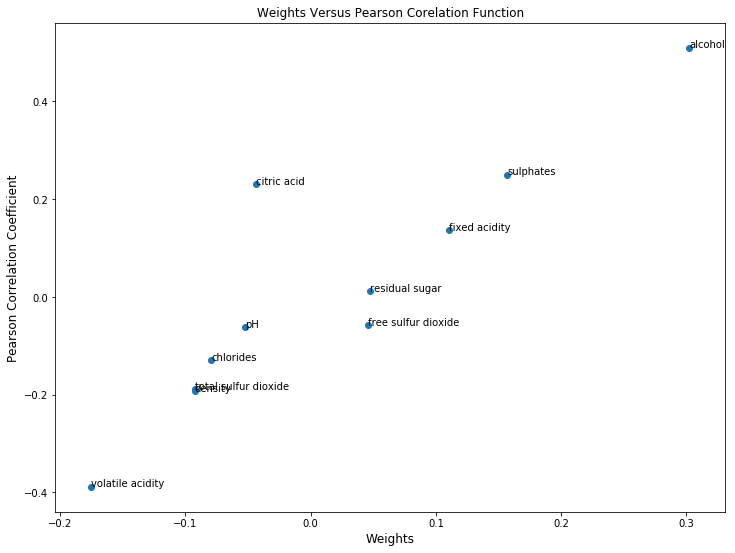

In [110]:
ridge_w=RidgeRegression(1)
ridge_w.fit(xTrain,yTrain)    
Pearson_correlation=[]
tags=RedWine_DataFrame.iloc[0,:]                                             # Get the feature names from the data
tag=tags[0:11].values
for i in range(len(list(x_Data))):
    Pearson_correlation.append((np.corrcoef(xTrain[:,i],yTrain)[0,1]))       # Compute Pearson correlation for each feature
weights=(ridge_w.w)[1:]                                                      # weights without the bias
fig, ax = plt.subplots()
ax.scatter(weights,Pearson_correlation)
for i, txt in enumerate(tag):
    ax.annotate(txt, (weights[i], Pearson_correlation[i]))                   # Label the points with the corresponding features
plt.ylabel('Pearson Correlation Coefficient', fontsize = '12')
plt.xlabel('Weights', fontsize = '12')
plt.title('Weights Versus Pearson Corelation Function')
plt.show()

## Remove Features and Retrain

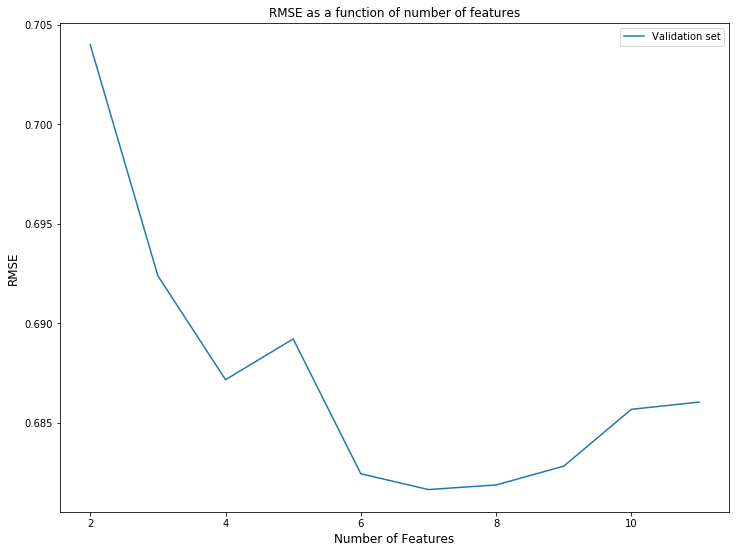

In [111]:
rmse=[]
features=[]
xTrain1=xTrain
xValid1=xValid
yTrain1=yTrain
yValid1=yValid
for i in range(len(list(x_Data))-1):
    features.append(xTrain1.shape[1])
    ridgereg=RidgeRegression(1)
    ridgereg.fit(xTrain1,yTrain1)    
    guesses = ridgereg.predict(xValid1)
    rmse.append(RMSE(yValid1,guesses))                    # Compute RMSE
    weight=abs(ridgereg.w)[1:]                            # Take absolute of weight vector
    min_weight=weight.min()
    min_weight_index=np.where(weight==min_weight)         # Get the index of minimum weight
    xTrain1=np.delete(xTrain1,min_weight_index,axis=1)
    xValid1=np.delete(xValid1,min_weight_index,axis=1)
plt.plot(features,rmse,label='Validation set')
plt.ylabel('RMSE', fontsize = '12')
plt.xlabel('Number of Features', fontsize = '12')
plt.title('RMSE as a function of number of features')
plt.legend(loc='best')
plt.show()

### Your Report

Answer the questions in the cells reserved for that purpose.

Mathematical equations should be written as LaTex equations; the assignment contains multiple examples of both inline formulas (such as the one exemplifying the notation for the norm of a vector $||\mathbf{x}||$ and those that appear on separate lines, e.g.:

$$
||\mathbf{x}|| = \sqrt{\mathbf{x}^T \mathbf{x}}.
$$



### Submission

Submit your report as a Jupyter notebook via Canvas.  Running the notebook should generate all the plots and results in your notebook.


### Grading 

Here is what the grade sheet will look like for this assignment.  A few general guidelines for this and future assignments in the course:

  * Your answers should be concise and to the point.  We will take off points if that is not the case.
  * Always provide a description of the method you used to produce a given result in sufficient detail such that the reader can reproduce your results on the basis of the description.  You can use a few lines of python code or pseudo-code.


Grading sheet for the assignment:

```
Part 1:  50 points.
(15 points):  Ridge regression is correctly implemented.
(15 points):  Plots of RMSE as a function of lambda are generated correctly.
(20 points):  Discussion of the results

Part 2:  25 points.
(15 points):  REC curves are generated correctly
(10 points):  discussion of REC curves

Part 3:  25 points.
(20 points):  Weight vector analysis
( 5 points):  Comparison to the published results
```


Grading will be based on the following criteria:

  * Correctness of answers to math problems
  * Math is formatted as LaTex equations
  * Correct behavior of the required code
  * Easy to understand plots 
  * Overall readability and organization of the notebook
  * Effort in making interesting observations where requested.
  * Conciseness.  Points may be taken off if the notebook is overly 
  